# 如何根据两张图片计算出拍摄这两张图片时相机发生了怎样的旋转
1. 首先我们需要提取图片的[特征点](../feature_extract/)。如果你还不了解如何提取两张图片的特征点请参考[从零开始实现FAST特征点提取算法教程](../feature_extract/%E4%BB%8E%E9%9B%B6%E5%BC%80%E5%A7%8B%E5%AE%9E%E7%8E%B0FAST%E7%89%B9%E5%BE%81%E7%82%B9%E6%8F%90%E5%8F%96%E7%AE%97%E6%B3%95%E6%95%99%E7%A8%8B.md)。
2. 找到两张图片中的相同特征点。
3. 根据2中找到相同特征点他们之间的位置关系，使用[最小二乘法](../solve_least_square/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95%E6%9C%89%E4%BB%80%E4%B9%88%E7%94%A8_%E5%A6%82%E4%BD%95%E7%94%A8%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95%E6%B1%82%E8%A7%A3%E6%96%B9%E7%A8%8B.ipynb)求解方程计算出相机发生的旋转。

本文就专注第3步中的求解。



图A


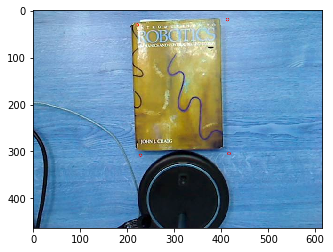

图B


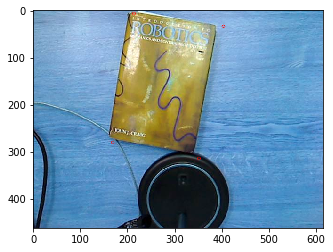

In [16]:
import numpy as np
# pA和pB分别表示是我们找到的图A与图B中的四个相同特征点。
pA = np.array([[221,  31],
       [413,  20],
       [416, 304],
       [228, 308]])
pB = np.array([[214,   7],
       [404,  34],
       [352, 314],
       [169, 280]])

import cv2
# 加载图A与图B并将特征点描绘上去
imgA_mat = cv2.imread('./book_A.jpg')
keyPoints_A = cv2.KeyPoint_convert(pA.reshape(-1,1,2))
cv2.drawKeypoints(imgA_mat,keyPoints_A, imgA_mat,color=(255, 0, 0))

imgB_mat = cv2.imread('./book_B.jpg')
keyPoints_B = cv2.KeyPoint_convert(pB.reshape(-1,1,2))
cv2.drawKeypoints(imgB_mat,keyPoints_B, imgB_mat,color=(255, 0, 0))


import matplotlib.pyplot as plt

print('图A')
plt.imshow(imgA_mat)
plt.show()
print('图B')
plt.imshow(imgB_mat)
plt.show()

图A到图B之间的旋转一定可以找到一个旋转矩阵R，使得$AR=B$。
所以根据最小二乘法有：$R=(A^TA)^{-1}A^TB$

[[  0.9970603   -0.07662082  18.64314738]
 [  0.07662082   0.9970603  -22.91867431]]
[[ 0.98719108  0.02441067]
 [-0.18719199  0.94053172]]
图A


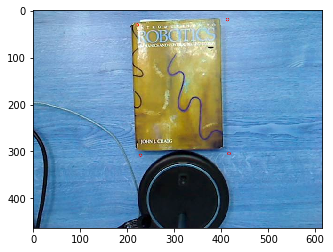

图B


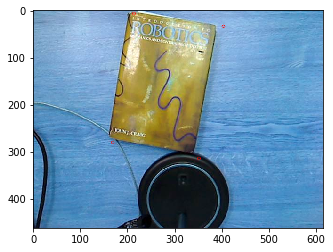

A旋转theta度后的图C，对比图B与图C


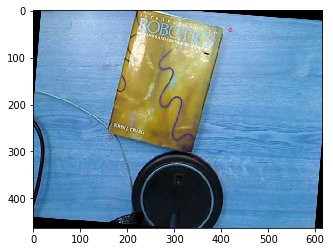

In [81]:
# import numpy as np
# pA和pB分别表示是我们找到的图A与图B中的四个相同特征点。
pA = np.array([[221,  31],
       [413,  20],
       [416, 304],
       [228, 308]])
pB = np.array([[214,   7],
       [404,  34],
       [352, 314],
       [169, 280]])

import cv2
# 加载图A与图B并将特征点描绘上去
imgA_mat = cv2.imread('./book_A.jpg')
keyPoints_A = cv2.KeyPoint_convert(pA.reshape(-1,1,2))
cv2.drawKeypoints(imgA_mat,keyPoints_A, imgA_mat,color=(255, 0, 0))

imgB_mat = cv2.imread('./book_B.jpg')
keyPoints_B = cv2.KeyPoint_convert(pB.reshape(-1,1,2))
cv2.drawKeypoints(imgB_mat,keyPoints_B, imgB_mat,color=(255, 0, 0))

##########使用最小二乘法求旋转矩阵R############
R = np.matmul(np.matmul(np.linalg.inv(np.matmul(pA.T, pA)),pA.T),pB)

(rows,cols) = imgA_mat.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),-np.arcsin(R[0,1])*180,1)
print(M)
#######我们进行逆旋转检验下效果########

imgC_mat = cv2.warpAffine(imgB_mat,M,(imgA_mat.shape[:2][1],imgA_mat.shape[:2][0]))
print(R)
print('图A')
plt.imshow(imgA_mat)
plt.show()
print('图B')
plt.imshow(imgB_mat)
plt.show()
print('A旋转theta度后的图C，对比图B与图C')
plt.imshow(imgC_mat)
plt.show()
